# Matrix Factorization Visualizations

## Simple SGD from Homework

In [1]:
import utils
import matrix_factorization as mf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
sns.set()
sns.set_style("white")

In [22]:
Y_train = utils.get_training_data()
Y_test = utils.get_test_data()
Y = utils.get_data()
movie_id, movie_title, movie_genre, genres = utils.get_movies()

M = 943 # users
N = 1682 # movies
K = 20
reg = 0.1
eta = 0.03

In [5]:
U, V, err = mf.train_model(Y, M, N, K, eta, reg)

Epoch  0: current avarage training error 0.494
Epoch  1: current avarage training error 0.434
Epoch  2: current avarage training error 0.412
Epoch  3: current avarage training error 0.399
Epoch  4: current avarage training error 0.387
Epoch  5: current avarage training error 0.374
Epoch  6: current avarage training error 0.367
Epoch  7: current avarage training error 0.362
Epoch  8: current avarage training error 0.355
Epoch  9: current avarage training error 0.349
Epoch 10: current avarage training error 0.340
Epoch 11: current avarage training error 0.336
Epoch 12: current avarage training error 0.330
Epoch 13: current avarage training error 0.329
Epoch 14: current avarage training error 0.325
Epoch 15: current avarage training error 0.323
Epoch 16: current avarage training error 0.317
Epoch 17: current avarage training error 0.314
Epoch 18: current avarage training error 0.311
Epoch 19: current avarage training error 0.308
Epoch 20: current avarage training error 0.311


In [6]:
# print('Average training error =', '{:.3f}'.format(err/len(Y_train)))
# print('Average test error =', '{:.3f}'.format(err_test/len(Y_test)))

In [7]:
A, S, BT = np.linalg.svd(V.T)
B = BT.T
V2 = A.T[0:2, :]@V.T
print(V2.shape)

(2, 1682)


In [14]:
YM = utils.list_to_matrix(Y, M, N)
print(YM.shape)

(943, 1682)


In [23]:
ratings = np.nanmean(YM, axis=0) # Mean rating of the movies
counts = np.sum(1-np.isnan(YM), axis=0) # Number of ratings for each movie
rank_ratings = np.argsort(-ratings) # Indices of ratings in descending order
rank_counts = np.argsort(-counts) # Indices of counts in descending order
print(ratings.shape, counts.shape)

(1682,) (1682,)


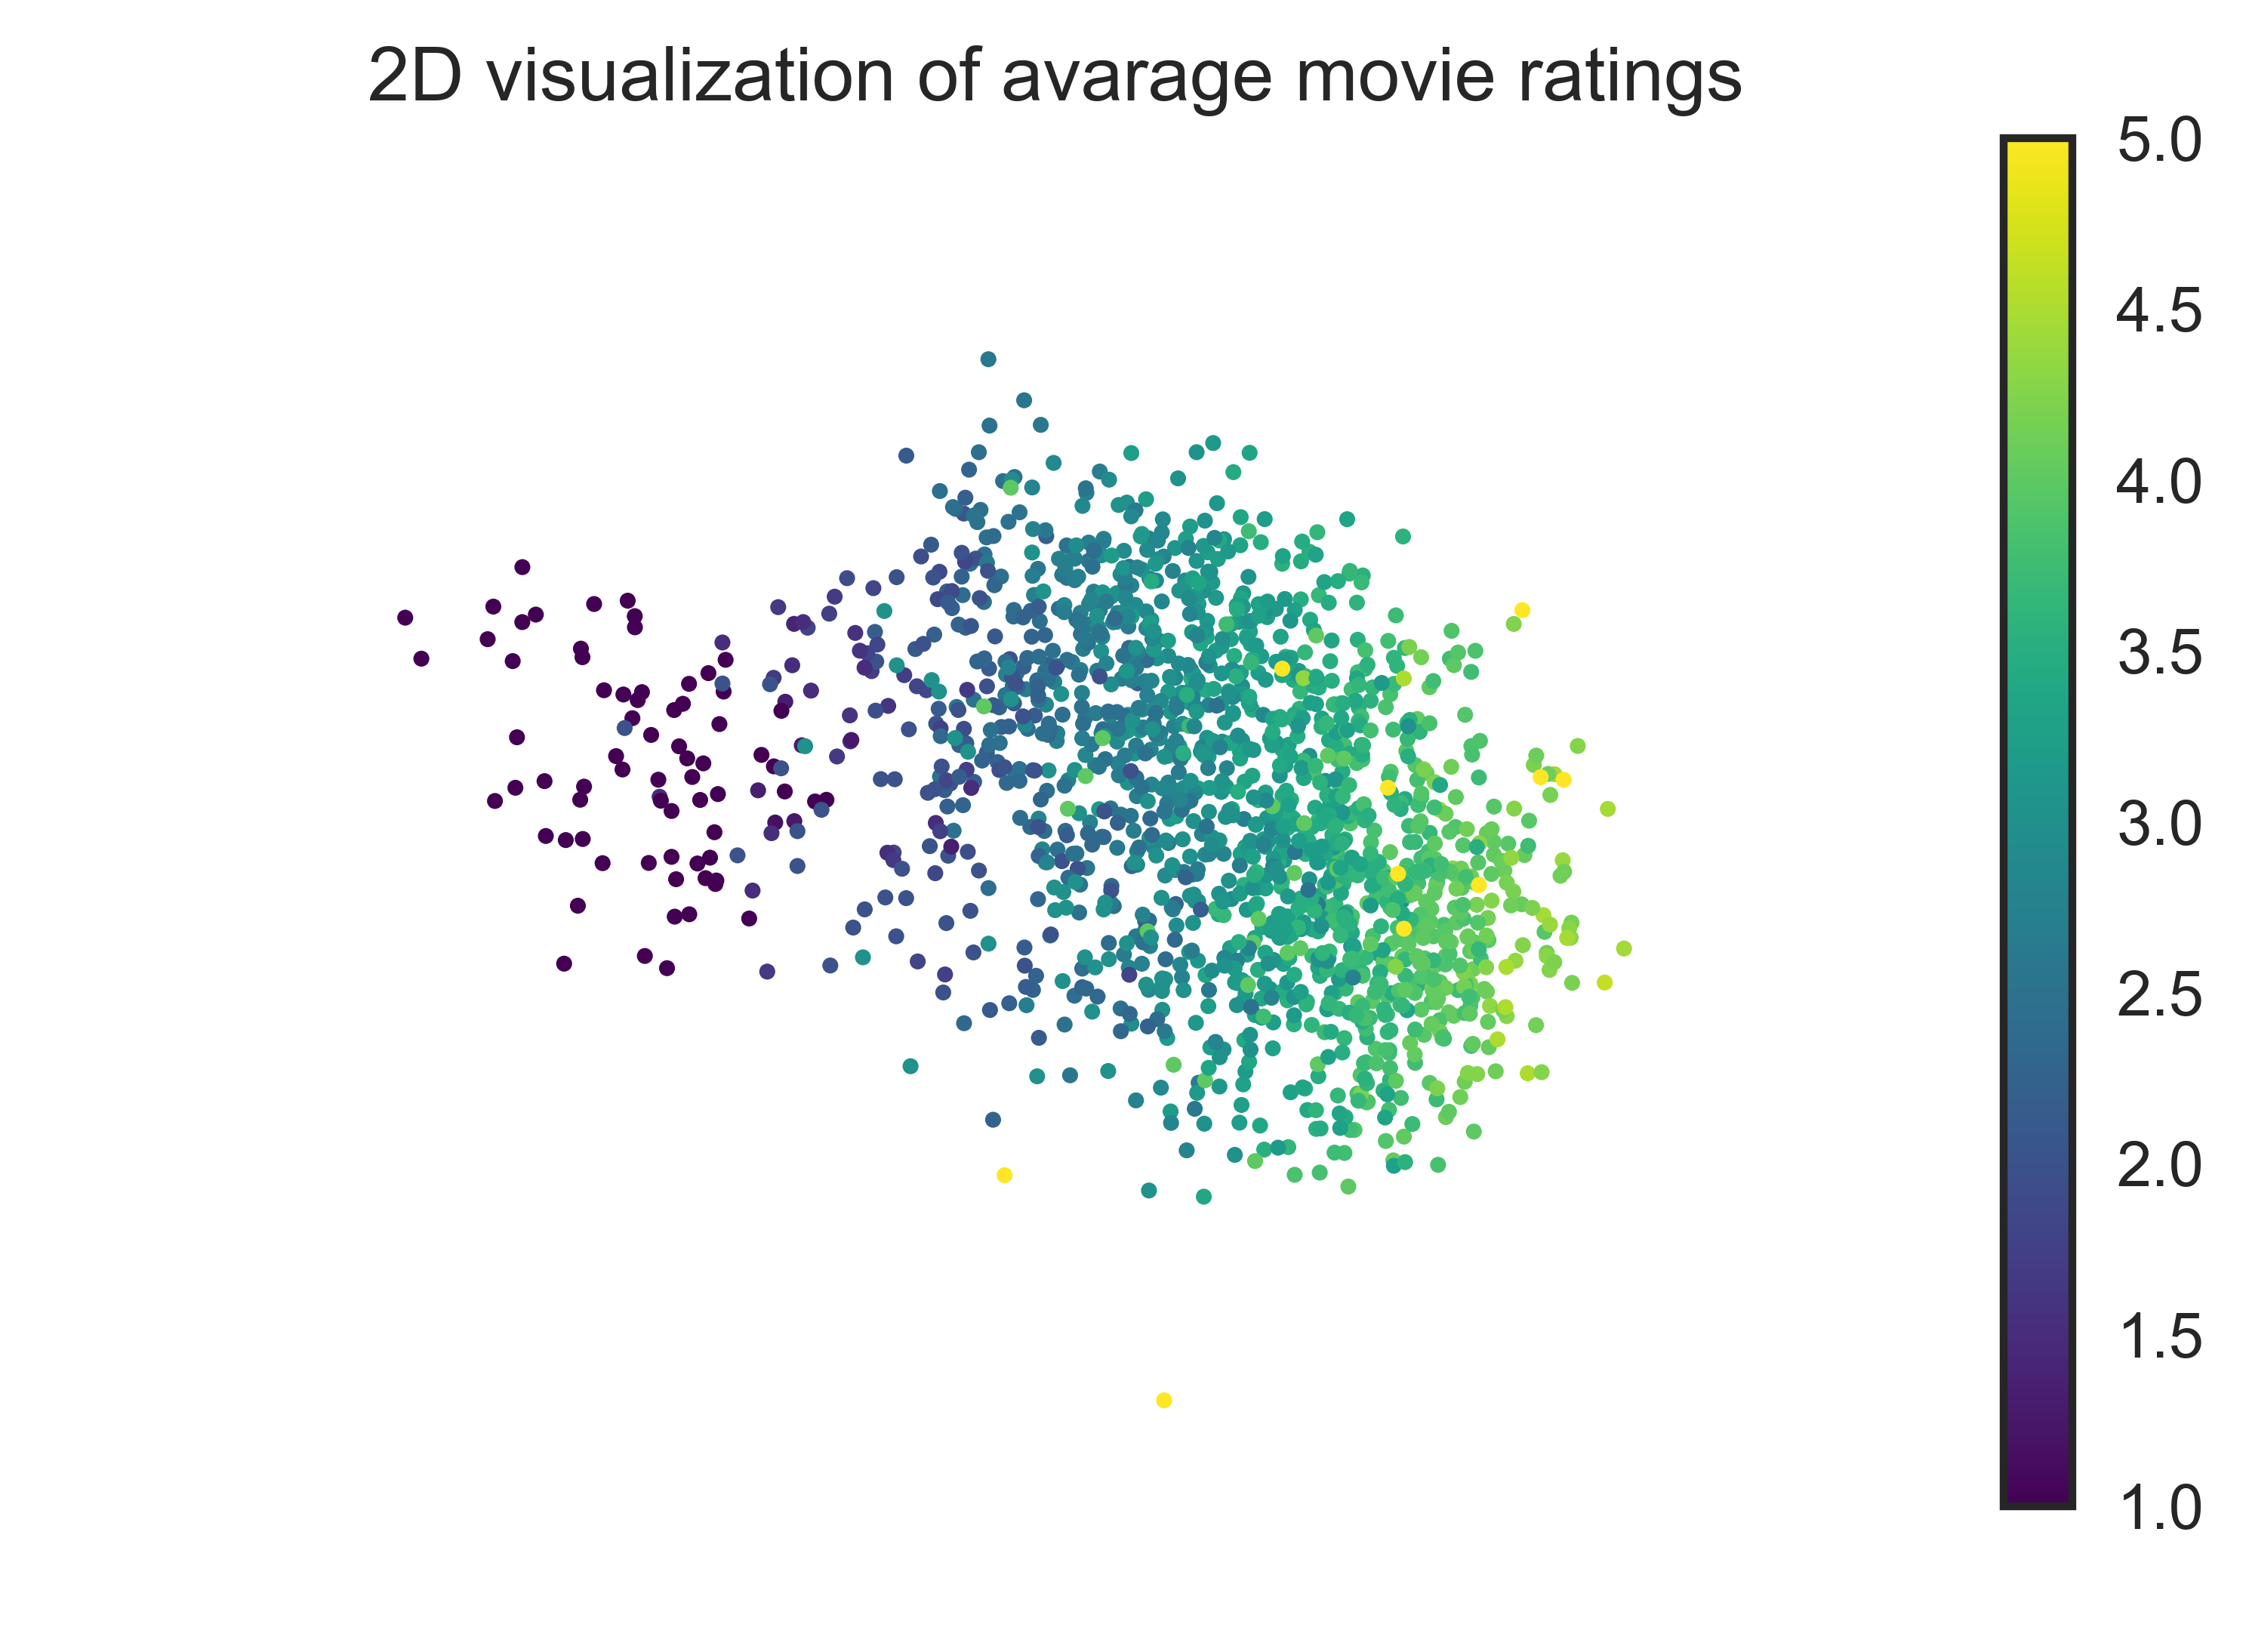

In [61]:
plt.figure(dpi=300)
plt.scatter(V2[0, :], V2[1, :], 5, ratings, cmap='viridis')
plt.title('2D visualization of avarage movie ratings')
plt.colorbar()
plt.axis('off')
plt.show()

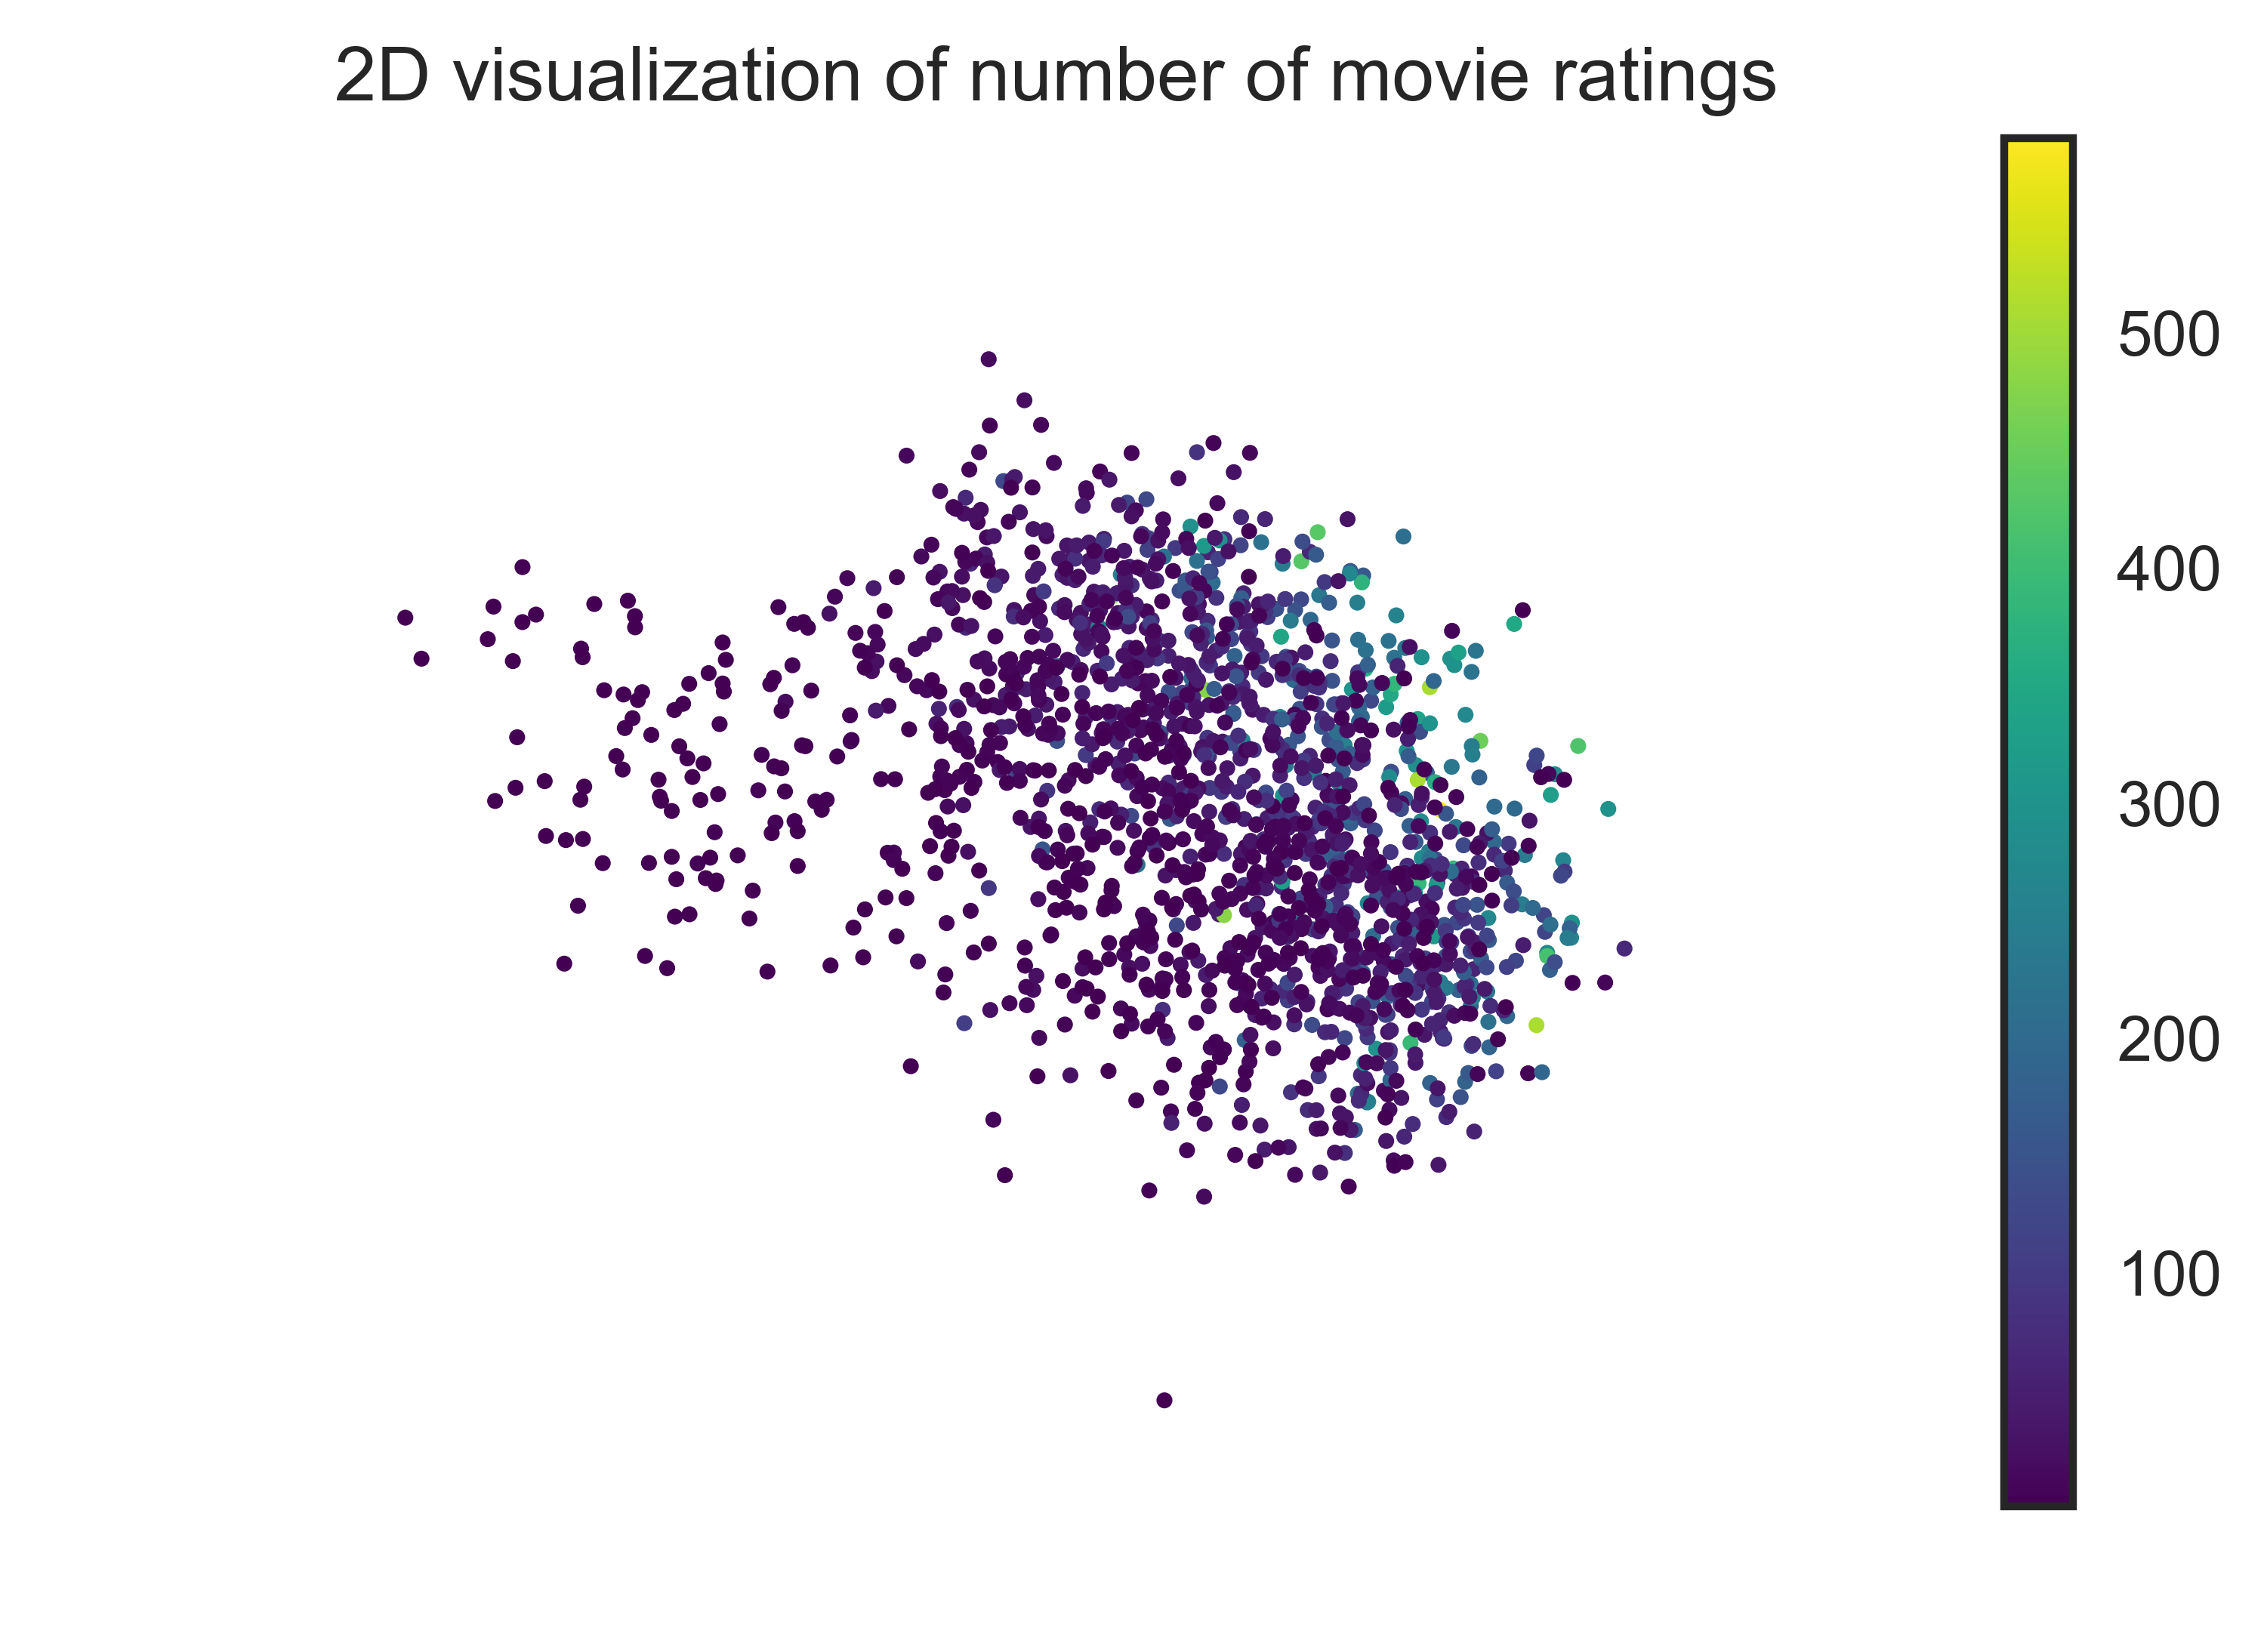

In [60]:
plt.figure(dpi=300)
plt.scatter(V2[0, :], V2[1, :], 5, counts, cmap='viridis')
plt.title('2D visualization of number of movie ratings')
plt.colorbar()
plt.axis('off')
plt.show()

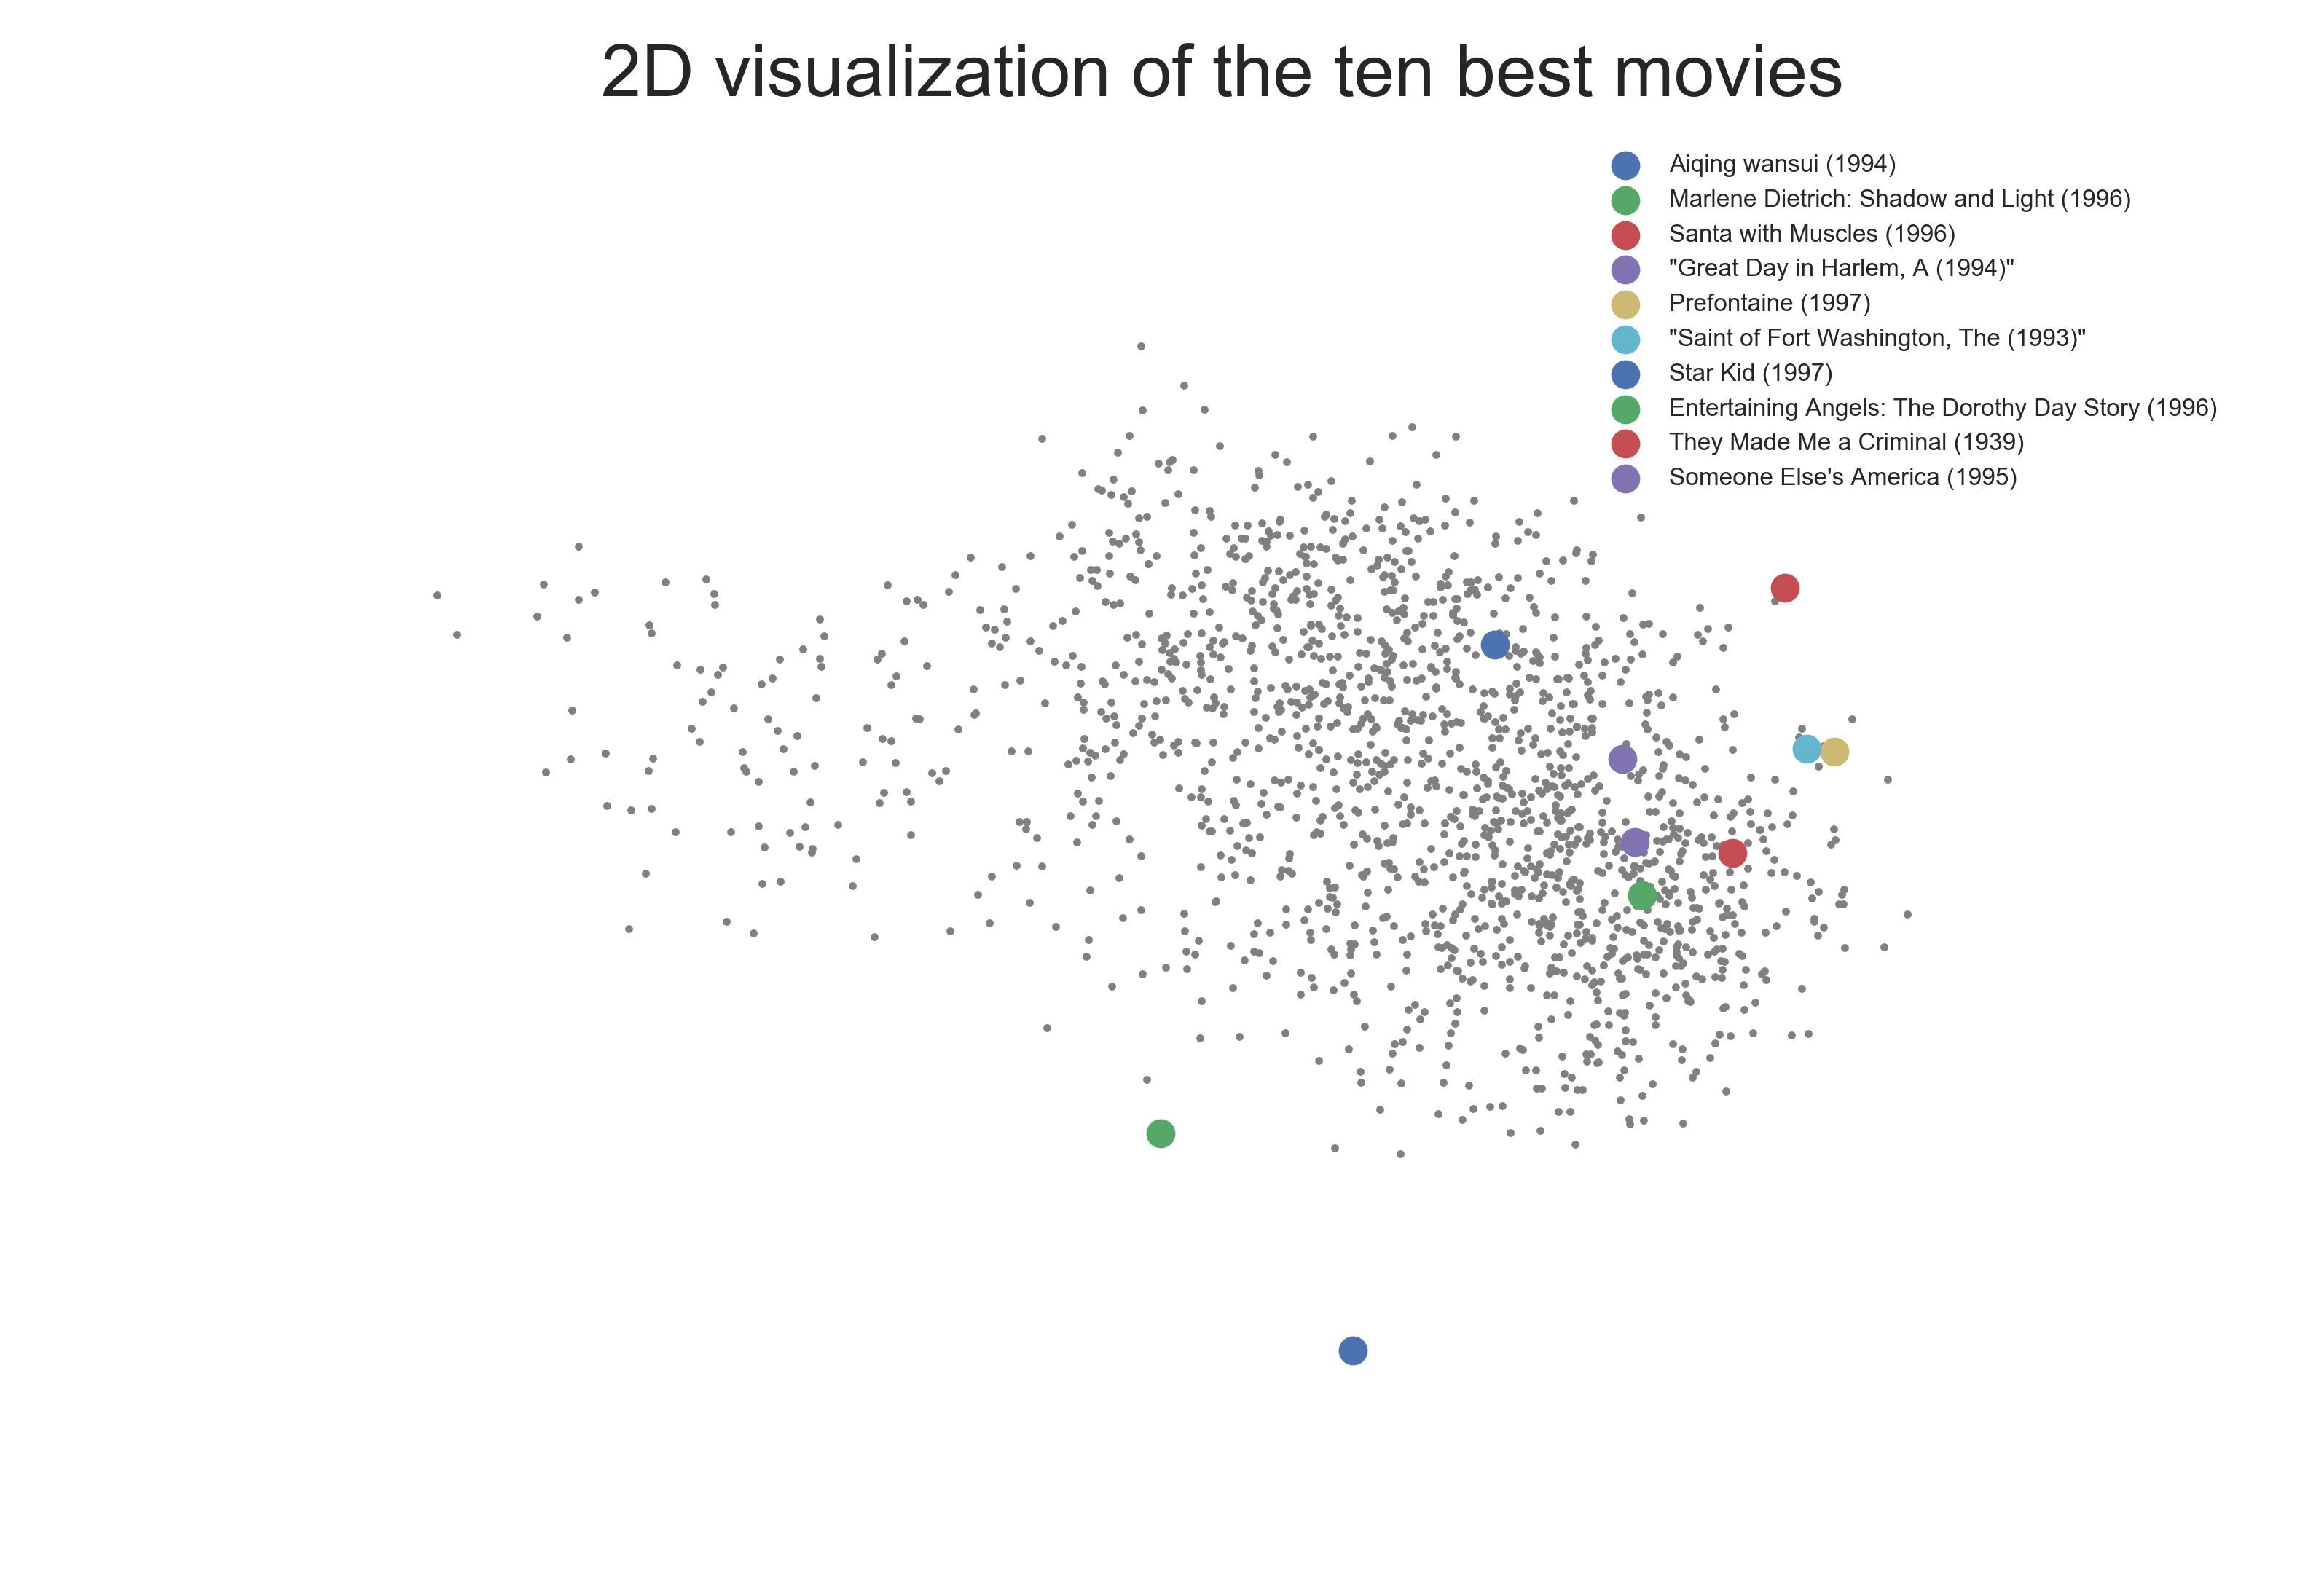

In [57]:
plt.figure(dpi=300)
plt.scatter(V2[0, :], V2[1, :], 1, 'gray')
for idx in rank_ratings[:10]:
    plt.scatter(V2[0, idx], V2[1, idx], 20, label=movie_title[idx])
plt.axis('off')
plt.legend(prop={'size': 4})
plt.title('2D visualization of the ten best movies')
plt.show()

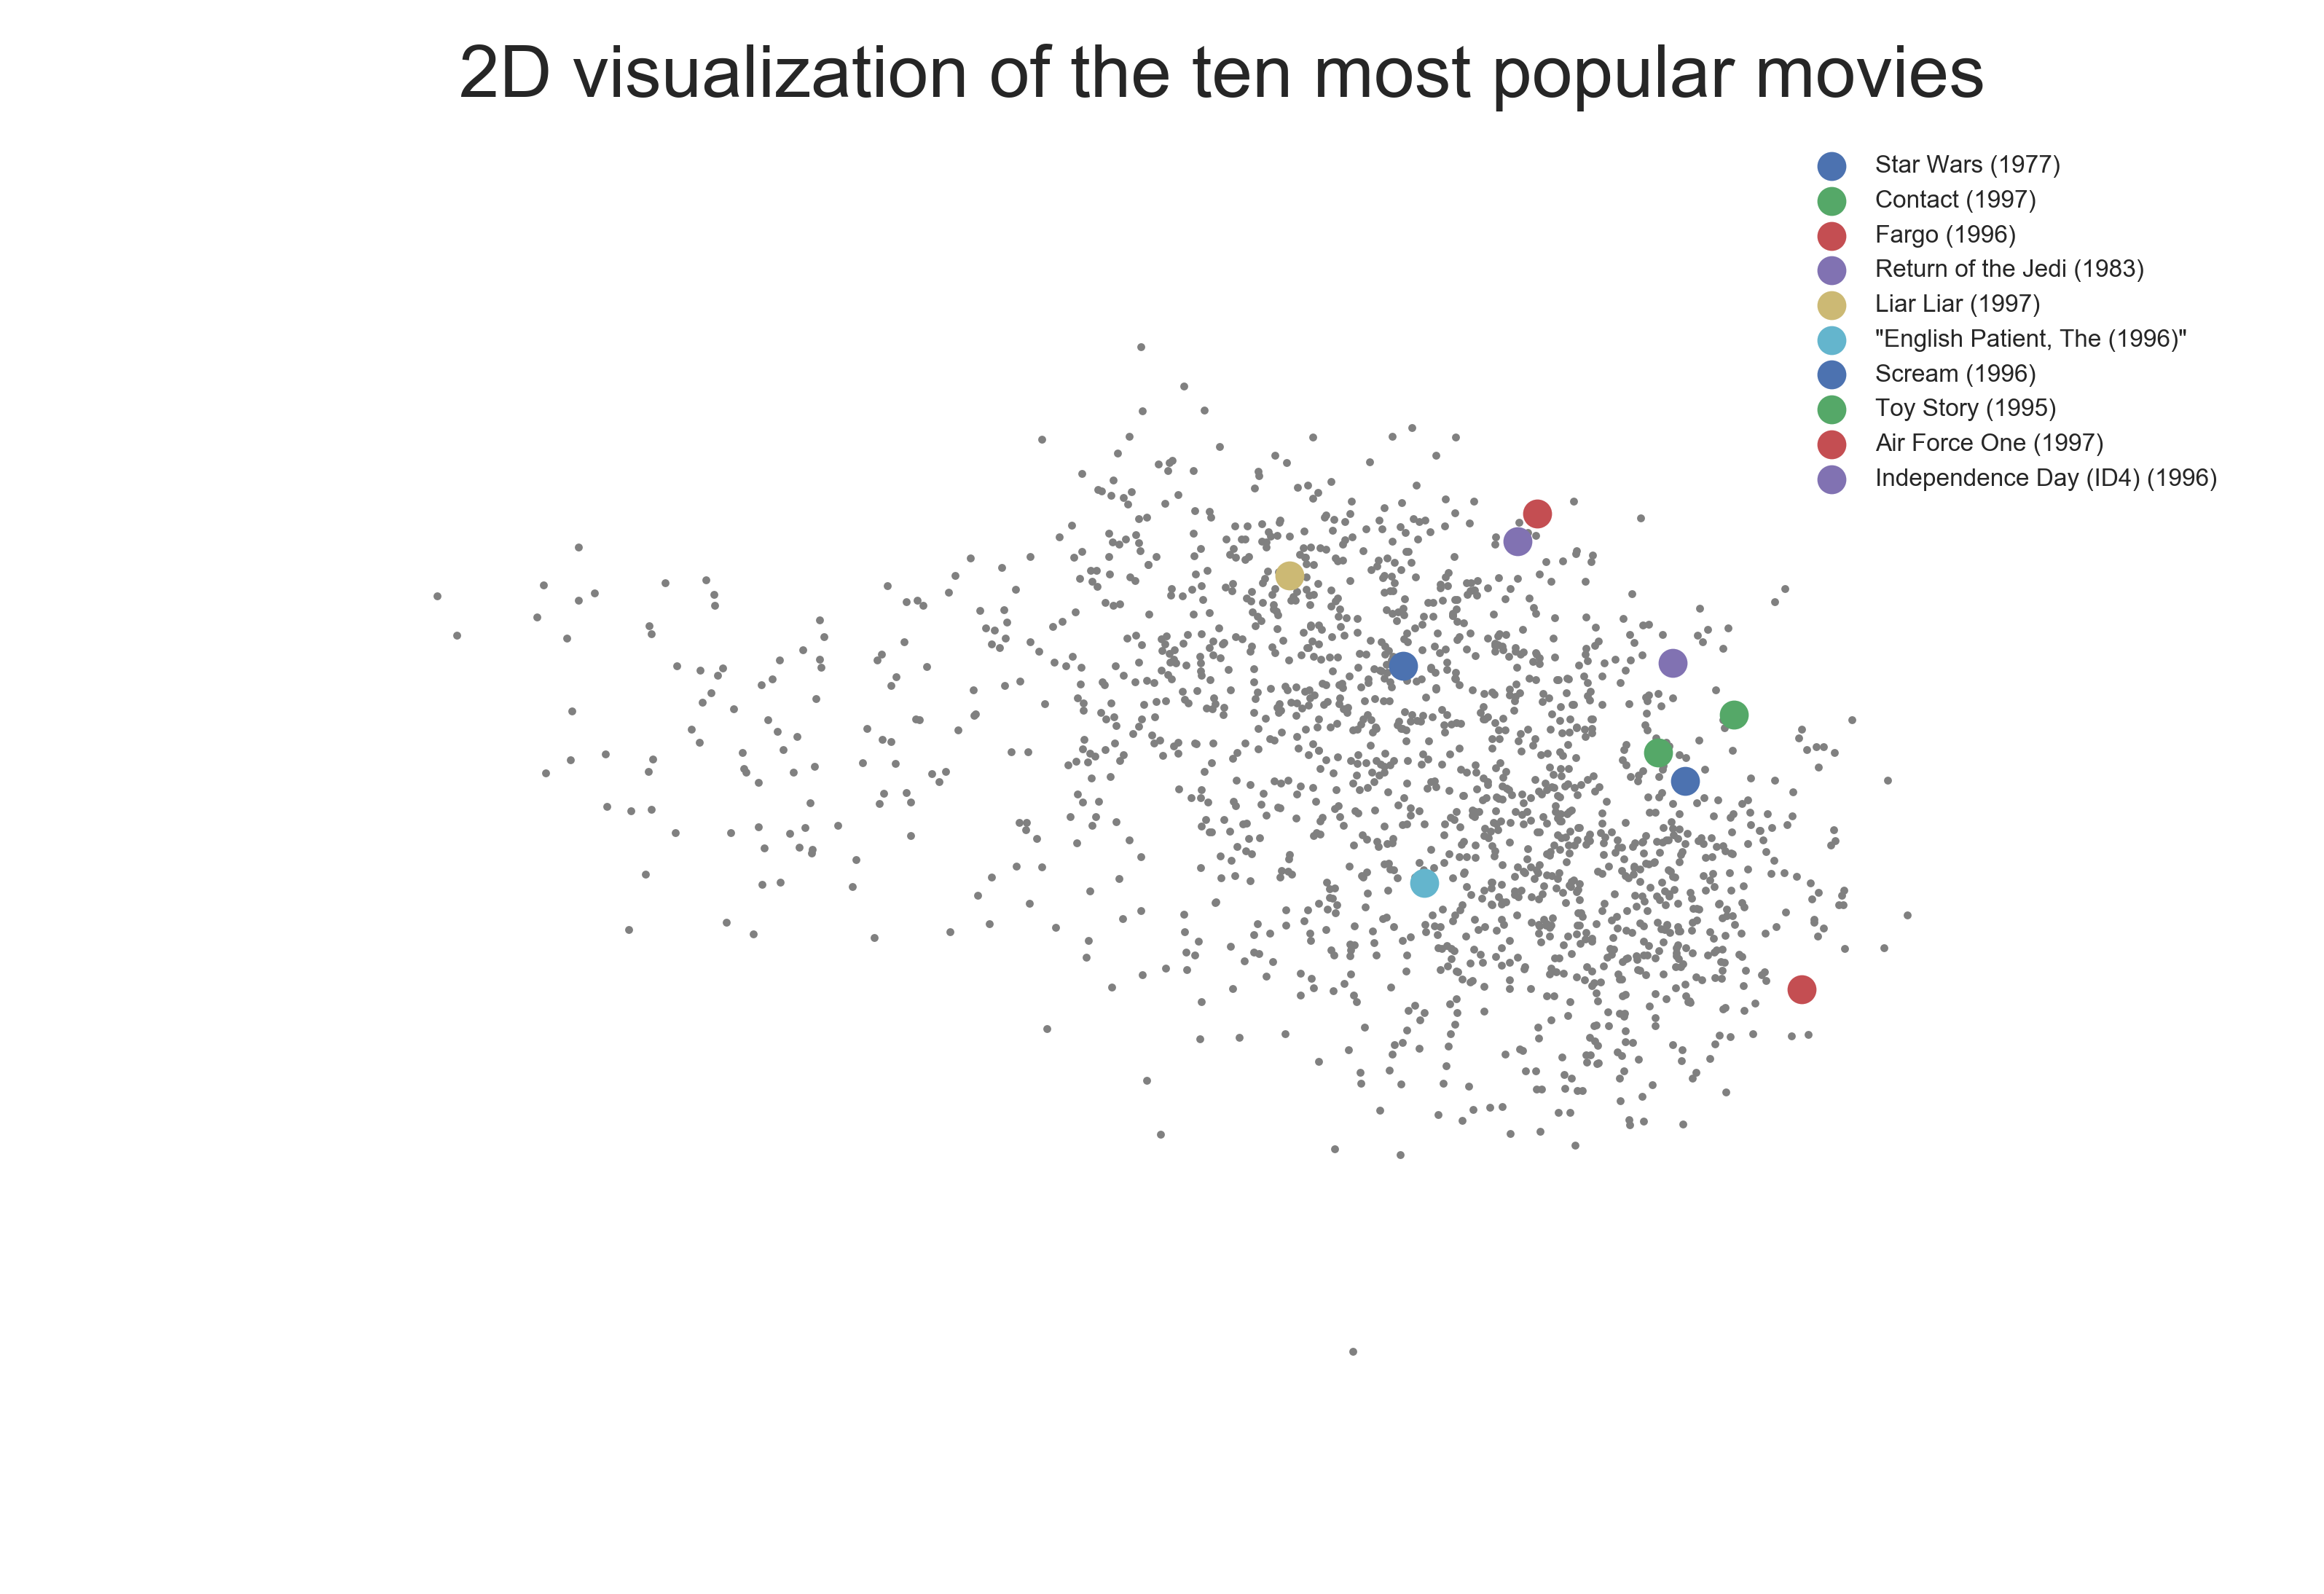

In [58]:
plt.figure(dpi=300)
plt.scatter(V2[0, :], V2[1, :], 1, 'gray')
for idx in rank_counts[:10]:
    plt.scatter(V2[0, idx], V2[1, idx], 20, label=movie_title[idx])
plt.axis('off')
plt.legend(prop={'size': 4})
plt.title('2D visualization of the ten most popular movies')
plt.show()